In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dataset_folder = tc.get_folder_path('Lund')
dataset = tc.processed_dataset(dataset_folder)

# Lund

In [4]:
import skfeature as skf
from skfeature.utility import construct_W

list_props = dataset.get_all_regionprops_list()




def uncorrelated_props_thesis(prop):
    thesis_uncorrelating_subselection = ['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
                                     'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
                                     'centroid-1', 'centroid-2', 'image_stdev',
                                     'avg distance of 6 closest points',
                                     'stddev distance of 6 closest points', 'touching neighbor count',
                                     'aspect_ratio']
    props = tc.min_maj_ax_to_aspectr(prop,del_min_maj=False)
    subselection = props[thesis_uncorrelating_subselection]

    return subselection

thesis_props_list = [uncorrelated_props_thesis(prop) for prop in list_props]

# Standardscaling as always 
sscaled_regprops_list = [StandardScaler().fit_transform(prop) for prop in thesis_props_list]

# copied from skfeature site - first we need to construct the Affinity Matrix (Sij in paper)   
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}


W_matrices = [construct_W.construct_W(prop, **kwargs_W) for prop in sscaled_regprops_list]

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


In [5]:
from skfeature.function.similarity_based import lap_score

scores = [lap_score.lap_score(scaled, W=W) for scaled,W in zip(sscaled_regprops_list,W_matrices)]

In [8]:
np_scores =np.array(scores)
scores_transpose = np_scores.T

keys = thesis_props_list[0].keys()
keys

Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

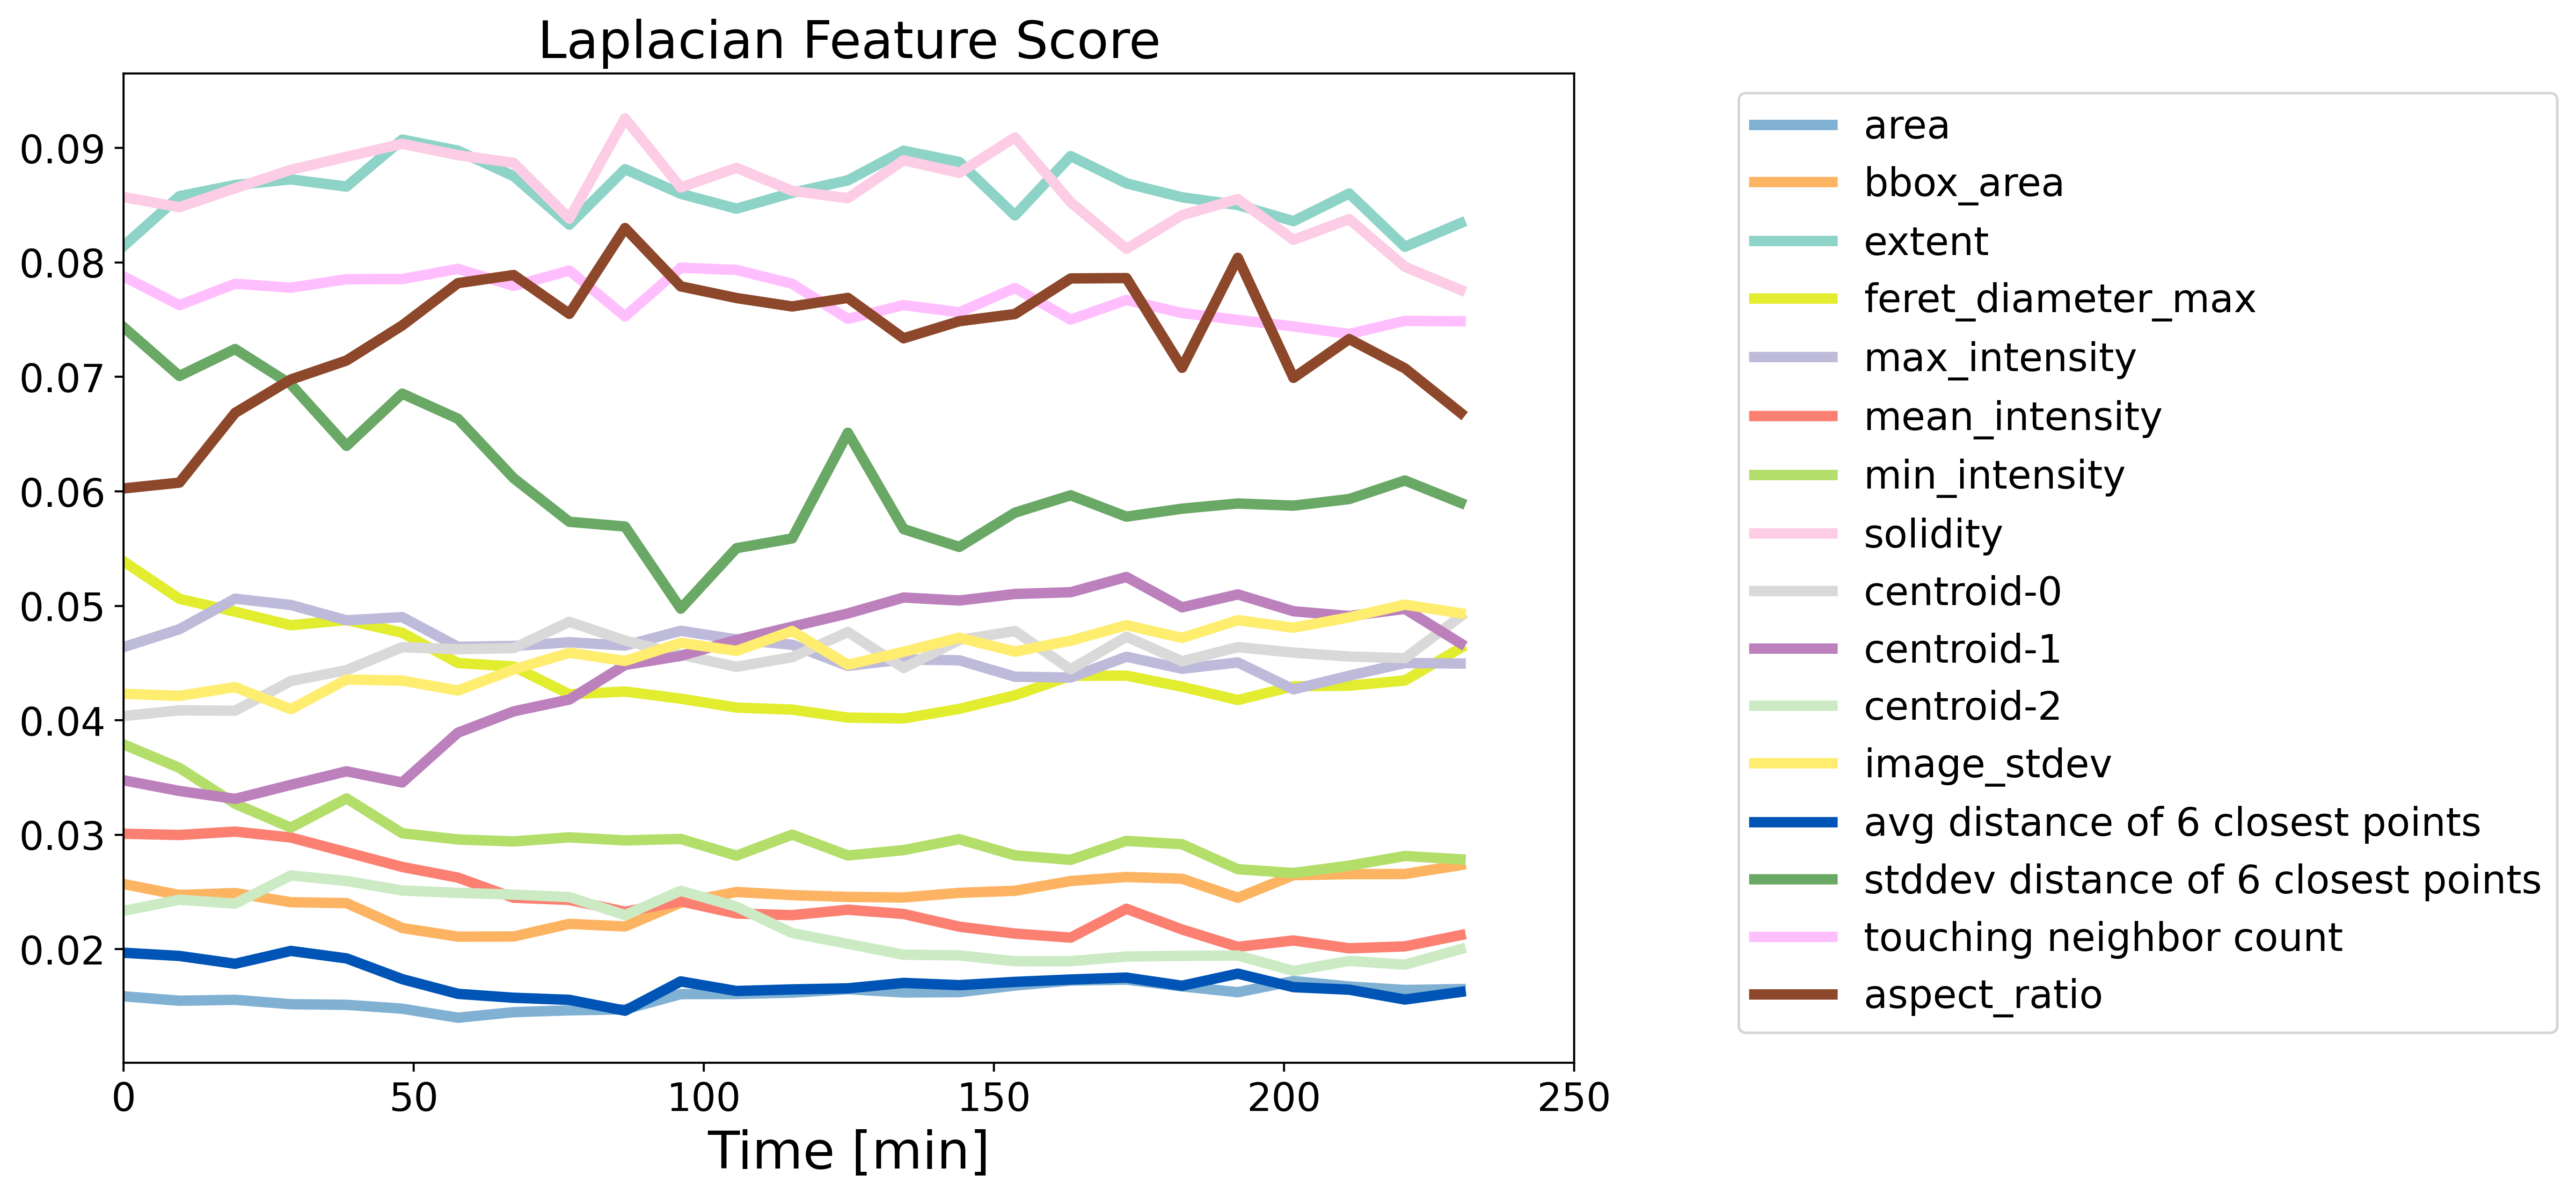

In [37]:
import beetlesafari as bs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400


lw = 4
big_fs = 20
small_fs = 15



timeslice_lund = bs.seconds_to_minutes(bs.hours_to_seconds(4/25))
lund_time_in_min = np.array(range(25))* timeslice_lund


cmap = tc.plot_cmap()

fig,ax = plt.subplots(1,1,figsize = (10,7))
for i,key,scor in zip(range(16),keys,scores_transpose):
    ax.plot(lund_time_in_min,scor,label=key,linewidth=lw, c = cmap[i])
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.1,1),fontsize=small_fs)
ax.set_title('Laplacian Feature Score',fontsize=big_fs)
ax.set_xlabel('Time [min]',fontsize=big_fs)
ax.set_xlim([0,250])

ax.set_xlabel('Time [min]', fontsize =big_fs)    
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)


# Wolgast

In [38]:
dataset_folder = tc.get_folder_path('wolgast')
dataset = tc.processed_dataset(dataset_folder)
list_props = dataset.get_all_regionprops_list()
thesis_props_list = [uncorrelated_props_thesis(prop) for prop in list_props]

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


In [39]:
# Standardscaling as always 
sscaled_regprops_list = [StandardScaler().fit_transform(prop) for prop in thesis_props_list]

# copied from skfeature site - first we need to construct the Affinity Matrix (Sij in paper)   
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}


W_matrices_w = [construct_W.construct_W(prop, **kwargs_W) for prop in sscaled_regprops_list]
scores_w = [lap_score.lap_score(scaled, W=W) for scaled,W in zip(sscaled_regprops_list,W_matrices_w)]

np_scores_w =np.array(scores_w)
scores_transpose_w = np_scores_w.T

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

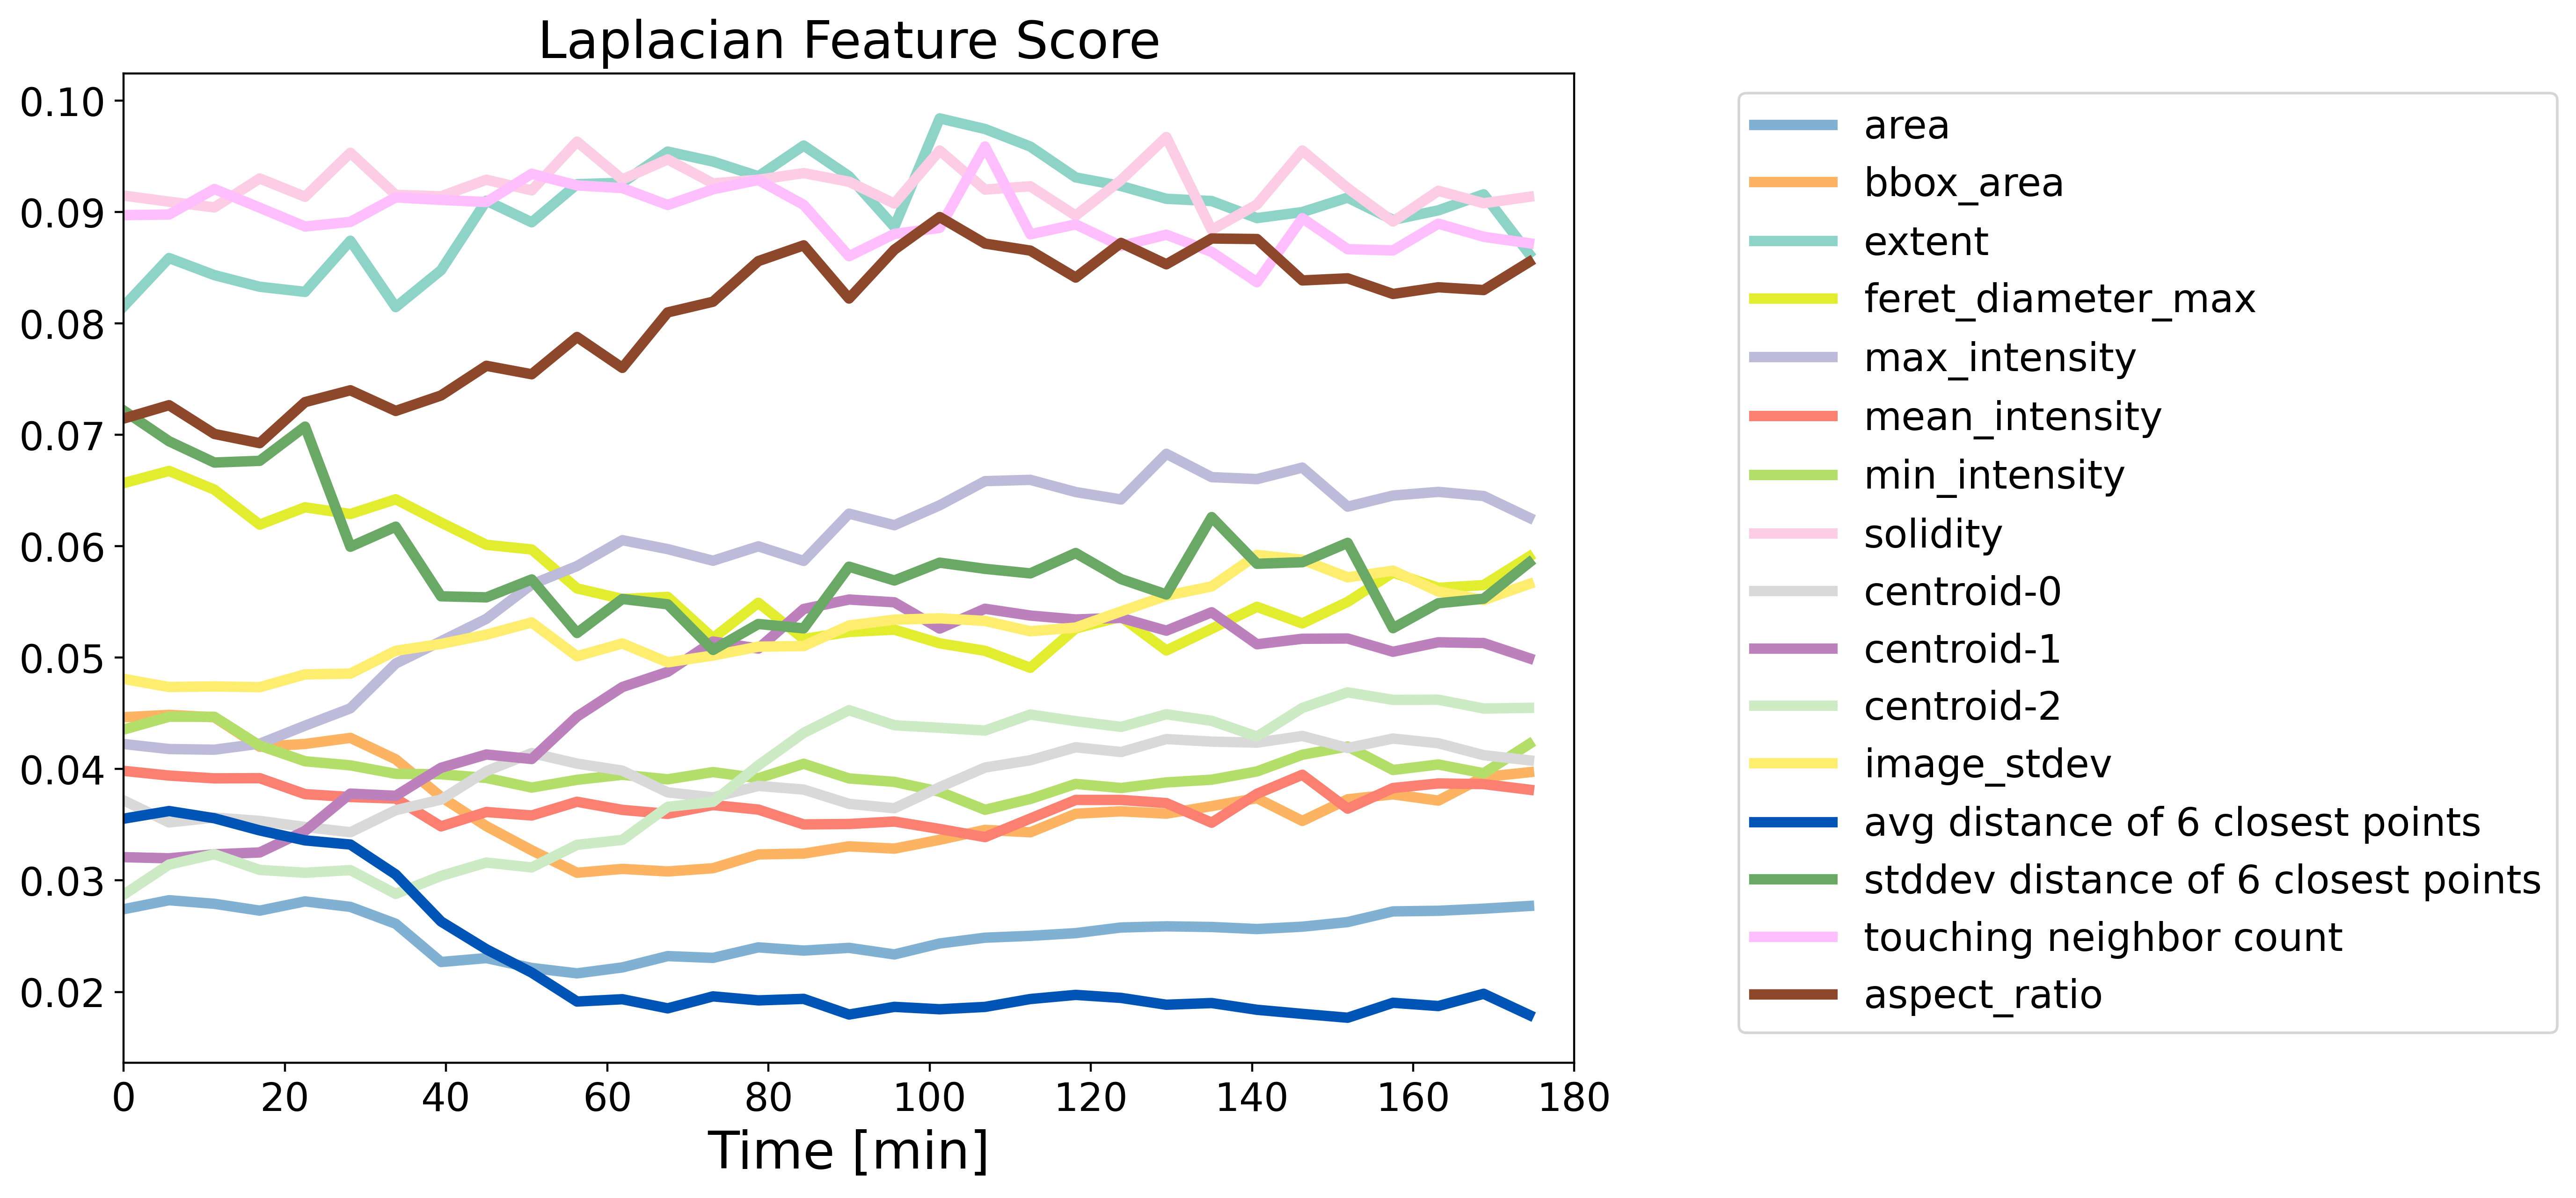

In [42]:
timeslice_duration = bs.hours_to_seconds(3)/32
timeslice_duration_mi = bs.seconds_to_minutes(timeslice_duration)
x_axis_finster_wolgast = np.array(range(32))*timeslice_duration_mi



fig,ax = plt.subplots(1,1,figsize = (10,7))
for i,key,scor in zip(range(16),keys,scores_transpose_w):
    ax.plot(x_axis_finster_wolgast,scor,label=key,linewidth=lw, c = cmap[i])
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.1,1),fontsize=small_fs)
ax.set_title('Laplacian Feature Score',fontsize=big_fs)
ax.set_xlabel('Time [min]',fontsize=big_fs)
ax.set_xlim([0,180])

ax.set_xlabel('Time [min]', fontsize =big_fs)    
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)